# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](Downloads/Lesson2/img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

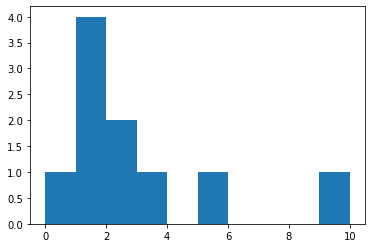

In [9]:
plt.hist(X[1]);

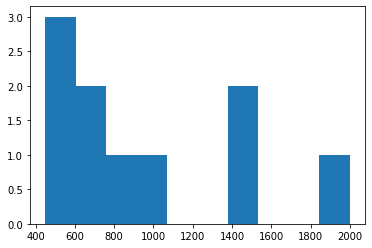

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

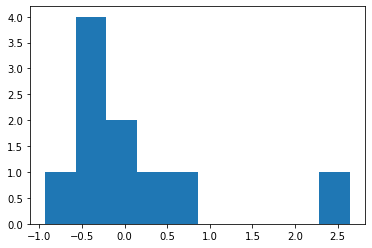

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

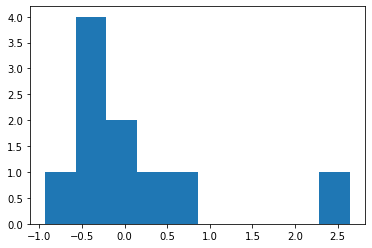

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](Downloads/Lesson2/img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 101.15109374760752, веса: [49.75785206  4.73024182  3.38830318  3.48195345]
# итерация: 200, MSE: 41.237635236164365, веса: [56.38650173  4.98308219  3.07843241  3.58395841]
# итерация: 300, MSE: 40.06825151834666, веса: [57.26559031  5.18000436  2.80778692  3.66132635]
# итерация: 400, MSE: 39.96724888179793, веса: [57.38217465  5.34219867  2.58138831  3.72847543]
# итерация: 500, MSE: 39.90950495203175, веса: [57.39763601  5.4759754   2.39206331  3.78649382]
# итерация: 600, MSE: 39.869530667136495, веса: [57.39968649  5.58643226  2.23376258  3.83640904]
# итерация: 700, MSE: 39.841699432189024, веса: [57.39995842  5.67772489  2.1014184   3.8791968 ]
# итерация: 800, MSE: 39.82231448032566, веса: [57.39999449  5.75324732  1.99078685  3.9157607 ]
# итерация: 900, MSE: 39.808809384288615, веса: [57.39999927  5.81577631  1.89831488  3.9469222 ]
# итерация: 1000, MSE: 39.79939890677346, веса: [57.3999999   5.86758737  1.82102859  3.97341779]


array([57.3999999 ,  5.86758737,  1.82102859,  3.97341779])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.46567866984041, веса: [57.39616376  5.6118117   2.40462336  3.66278672]
# итерация: 1000, MSE: 39.51478437167104, веса: [57.39808324  5.91717241  1.81828063  3.95036757]
# итерация: 1500, MSE: 38.7674224941454, веса: [57.39791081  6.0490817   1.58160265  4.05773898]
# итерация: 2000, MSE: 38.47426620474431, веса: [57.39783918  6.1045491   1.48587162  4.09903801]
# итерация: 2500, MSE: 38.35753545375121, веса: [57.39780972  6.12752731  1.44710307  4.11524343]
# итерация: 3000, MSE: 38.310672778842175, веса: [57.39779767  6.1369653   1.43139126  4.12168445]
# итерация: 3500, MSE: 38.29177396067068, веса: [57.39779276  6.14082251  1.42502088  4.12426516]
# итерация: 4000, MSE: 38.284133023513604, веса: [57.39779076  6.14239427  1.42243731  4.12530429]
# итерация: 4500, MSE: 38.28103924853894, веса: [57.39778995  6.14303362  1.42138935  4.12572397]
# итерация: 5000, MSE: 38.27978554446157, веса: [57.39778962  6.14329343  1.42096424  4.12589377]


array([57.39778962,  6.14329343,  1.42096424,  4.12589377])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406399, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280036, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.778523565788916, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.777887486171274, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.77777930470262, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [27]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

[[57.399713    6.12209394  1.42892499  4.11620609]
 [57.39713014  6.12102515  1.4301203   4.11587451]
 [57.37131434  6.11038803  1.44200443  4.11257825]
 [57.11442786  6.0088442   1.55430443  4.08144793]
 [54.66666667  5.3118901   2.25660813  3.88109191]]


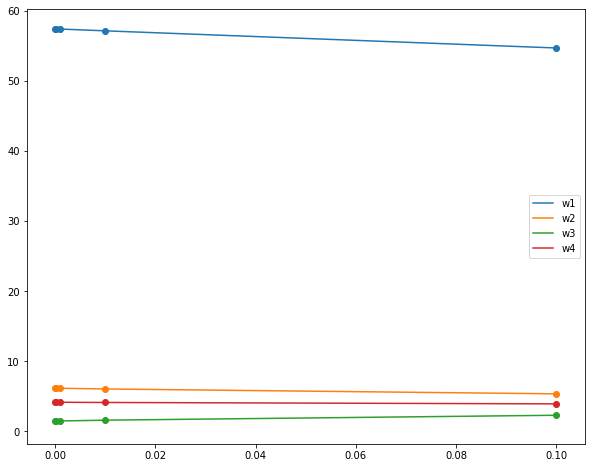

In [28]:
w = 0
for i in np.logspace(-5, -1, 5):
    if i == 1e-5:
        w = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i)
    else:
        w = np.vstack((w, eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i)))  
print(w)

plt.figure(figsize=(10, 8))
plt.plot(np.logspace(-5, -1, 5), w[:,0], label='w1')
plt.scatter(np.logspace(-5, -1, 5), w[:,0])
plt.plot(np.logspace(-5, -1, 5), w[:,1], label='w2')
plt.scatter(np.logspace(-5, -1, 5), w[:,1])
plt.plot(np.logspace(-5, -1, 5), w[:,2], label='w3')
plt.scatter(np.logspace(-5, -1, 5), w[:,2])
plt.plot(np.logspace(-5, -1, 5), w[:,3], label='w4')
plt.scatter(np.logspace(-5, -1, 5), w[:,3])
plt.legend();

In [29]:
np.logspace(-5, -1, 5)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

стандартизация - приводит значение признака к нормальному распределению, с средним 0 и дисперсией 1.<br> 
нормализация - приведение признаков к такому виду, чтобы каждый из них лежал в заданном диапазоне. <br>
применять одновременно и то и другое бессмысленно.

#### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации

In [30]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [32]:
eval_model_reg3(X_st, y, iterations=100, alpha=1e-2, lambda_=1e-4)

# итерация: 10, MSE: 2322.773789905299, веса: [10.90586337  1.31821102  2.00993965  2.87765373]
# итерация: 20, MSE: 1553.7639793301291, веса: [19.41089613  2.17044862  2.76318813  3.63318138]
# итерация: 30, MSE: 1047.5701947316322, веса: [26.36012712  2.68020485  3.17221017  4.05018071]
# итерация: 40, MSE: 711.9237035953339, веса: [32.0381548   2.99557001  3.38678477  4.2760425 ]
# итерация: 50, MSE: 488.56499800973614, веса: [36.67751681  3.2003345   3.49163732  4.39413385]
# итерация: 60, MSE: 339.6683337092888, веса: [40.46821334  3.34191397  3.53469254  4.45160411]
# итерация: 70, MSE: 240.32293709464747, веса: [43.56548841  3.4471465   3.54305714  4.47511464]
# итерация: 80, MSE: 174.00759535002317, веса: [46.09618763  3.53122914  3.53206117  4.47973714]
# итерация: 90, MSE: 129.72760670626937, веса: [48.16395315  3.60277323  3.51037272  4.47398734]
# итерация: 100, MSE: 100.15399586441185, веса: [49.85346813  3.66666421  3.48289126  4.46267261]


array([49.85346813,  3.66666421,  3.48289126,  4.46267261])